Models 5-8

# Model 5: Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Select features and target

In [2]:
df = pd.read_csv('data/AmesHousingCleanedQuadratic.csv')
numeric_columns = df.select_dtypes(include=[np.number]).columns
most_corr_columns = df[numeric_columns].corr().nlargest(10, 'saleprice')['saleprice'].index

In [3]:
df.columns

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
      

In [4]:
# same as above

selected_features_5 = list(most_corr_columns.drop('saleprice'))
X5 = df.loc[:,selected_features_5]
y5 = df['saleprice']

T-T split

In [5]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3,random_state=42)

Fit model

In [6]:
lr_model5 = Lasso(alpha = 1e4) # alpha == lambda
    # as alpha increases, importance of features reduces and coefs drops off
    # so LASSO has features selection benefit
lr_model5.fit(X_train5,y_train5)

Lasso(alpha=10000.0)

Model prediction

In [7]:
### Get the predictions on the training set
train_set_pred5 = lr_model5.predict(X_train5)

In [8]:
### Get the predictions on the test set
test_set_pred5 = lr_model5.predict(X_test5)

View residuals

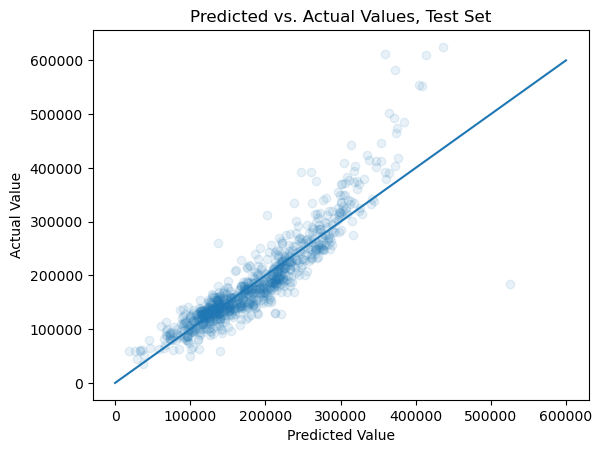

In [9]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred5, y_test5, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [10]:
# r2
lr_model5.score(X_test5, y_test5)

0.8268925732437518

In [11]:
mae5 = mean_absolute_error(y_test5, test_set_pred5)
train_mae5 = mean_absolute_error(y_train5, train_set_pred5)
print(f"Train MAD: {train_mae5:.2f}")
print(f"Val MAD: {mae5:.2f}")

Train MAD: 22851.33
Val MAD: 22572.23


In [12]:
rmse5 = np.sqrt(mean_squared_error(y_test5, test_set_pred5))
train_rmse5 = np.sqrt(mean_squared_error(y_train5, train_set_pred5))
print(f"Train RMSE: {train_rmse5:.2f}")
print(f"Val RMSE: {rmse5:.2f}")

Train RMSE: 35374.85
Val RMSE: 34883.32


In [13]:
# print(
#     'rmse for four models, in order: ', 
#     round(rmse1), 
#     round(rmse2), 
#     round(rmse3), 
#     round(rmse4),
#     round(rmse5)
# )


# Model 6: Cross validation

### Cross-Validation
Cross validation is a more sophisticated, yet more time intensive alternative to a single train-test split.  The idea is to divide your data set into "folds" (e.g. 5 equally sized subsets of your data).  We then iteratively select each fold to be the test set and the rest to be the training set.  We then judge the performance on the 5 different test folds.

This is frequently done to select "nuisance parameters".  You can try a bunch of different values, see which one gives the best results on cross validation, and then train your model on the entire data set using the best parameter value.

Define alpha

In [14]:
alphavec = 10**np.linspace(-3,9,27)
alphavec

array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
       2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
       1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
       1.19377664e+08, 3.45510729e+08, 1.00000000e+09])

Select features and target

In [15]:
# same as above

selected_features_6 = list(most_corr_columns.drop('saleprice'))
X6 = df.loc[:,selected_features_6]
y6 = df['saleprice']

T-T split

In [16]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.3,random_state=42)

Fit model

In [17]:
lr_model6 = LassoCV(alphas = alphavec, cv=5)
lr_model6.fit(X_train6, y_train6)

LassoCV(alphas=array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
       2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
       1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
       1.19377664e+08, 3.45510729e+08, 1.00000000e+09]),
        cv=5)

Determine best alpha then fits on that then returns

In [18]:
lr_model6.alpha_
list(zip(X_train6.columns,lr_model6.coef_))

[('OQ2', 4569.687976486784),
 ('overall_qual', -34538.19856695539),
 ('gr_liv_area', 50.24417373678724),
 ('garage_cars', 11503.514425147323),
 ('garage_area', 3.939064976225647),
 ('total_bsmt_sf', 19.871555439426107),
 ('1st_flr_sf', 4.127587552913159),
 ('year_built', 393.29210535049003),
 ('full_bath', -5386.321237962076)]

Model prediction

In [19]:
### Get the predictions on the training set
train_set_pred6 = lr_model6.predict(X_train6)

In [20]:
### Get the predictions on the test set
test_set_pred6 = lr_model6.predict(X_test6)

View residuals

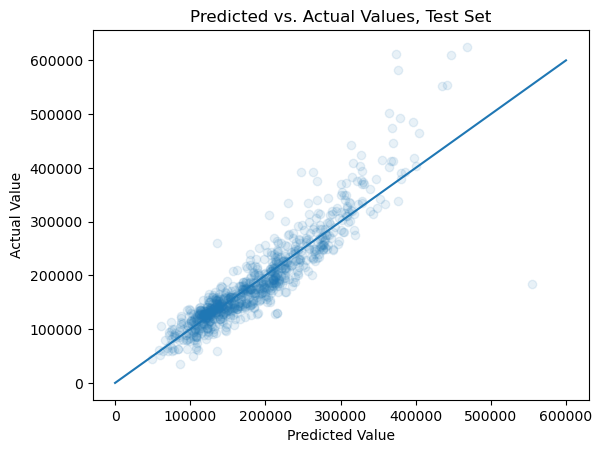

In [21]:
## Plot predicted vs actual - more like residuals

plt.scatter(test_set_pred6, y_test6, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))
plt.title('Predicted vs. Actual Values, Test Set')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show();

Assess model

In [22]:
# r2
lr_model6.score(X_test6, y_test6)

0.8379868250292184

In [23]:
mae6 = mean_absolute_error(y_test6, test_set_pred6)
train_mae6 = mean_absolute_error(y_train5, train_set_pred6)
print(f"Train MAD: {train_mae6:.2f}")
print(f"Val MAD: {mae6:.2f}")

Train MAD: 22054.60
Val MAD: 21773.21


In [24]:
rmse6 = np.sqrt(mean_squared_error(y_test6, test_set_pred6))
train_rmse6 = np.sqrt(mean_squared_error(y_train6, train_set_pred6))
print(f"Train RMSE: {train_rmse6:.2f}")
print(f"Val RMSE: {rmse6:.2f}")

Train RMSE: 34371.60
Val RMSE: 33747.00


Compare to other models

In [25]:
# print(
#     'rmse for four models, in order: ', 
#     round(rmse1), 
#     round(rmse2), 
#     round(rmse3), 
#     round(rmse4),
#     round(rmse5),
#     round(rmse6)
# )


# Model 7: Lasso with standard scaling

### Scaling Parameters
One issue with Regularized Linear Regression is that the "size" of a coefficient may be more reflective of the units or scale of the associated variable.  For example, if a distance is measured in millimeters it will have a larger coefficient than if it is measured in miles.  For this reason, best practice is to "standardize" the variables prior to running a regularized regression.  Standardizing means adding a constant and then dividing by another constant so that the resulting variable has mean 0 and standard deviation 1.  This ensures that the variables are penalized "fairly" with respect to one another.

We demonstrate how to do this below.

### Fit to train, then transform to train and test

Select features and target

In [26]:
# same as above

selected_features_7 = list(most_corr_columns.drop('saleprice'))
X7 = df.loc[:,selected_features_7]
y7 = df['saleprice']

T-T split

In [27]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.3,random_state=42)

Fit standard scaler

In [28]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train7)

StandardScaler()

In [29]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_trans = std.transform(X_train7)

View a feature before and after standard scaling:

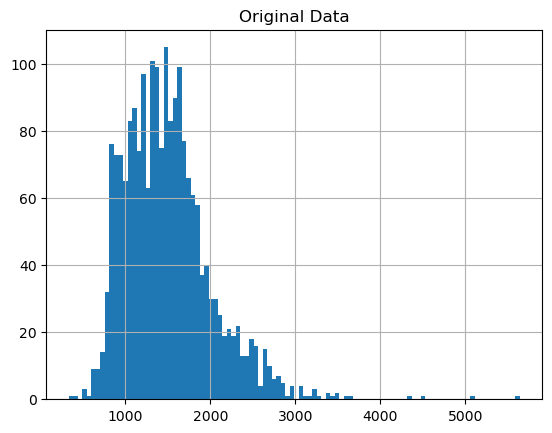

In [30]:
X_train7['gr_liv_area'].hist(bins=100);
plt.title('Original Data')
plt.show()

In [31]:
pd.DataFrame(X_trans, columns = X_train7.columns).head()

,OQ2,overall_qual,gr_liv_area,garage_cars,garage_area,total_bsmt_sf,1st_flr_sf,year_built,full_bath
0,-0.774059,-0.756619,0.979716,1.663255,1.880283,-0.107443,-0.400301,-0.690420,0.793489
1,-0.774059,-0.756619,-0.047833,-0.992515,-0.079750,0.879823,0.812428,-0.065290,-1.008777
2,-0.147676,-0.038846,0.053174,0.335370,-0.323000,-0.533146,-0.883337,0.888856,0.793489
3,1.446751,1.396700,-0.595599,0.335370,0.289803,0.322788,0.087874,0.625643,0.793489
4,0.592594,0.678927,-0.162436,0.335370,-0.332355,0.739432,0.660837,1.119167,0.793489


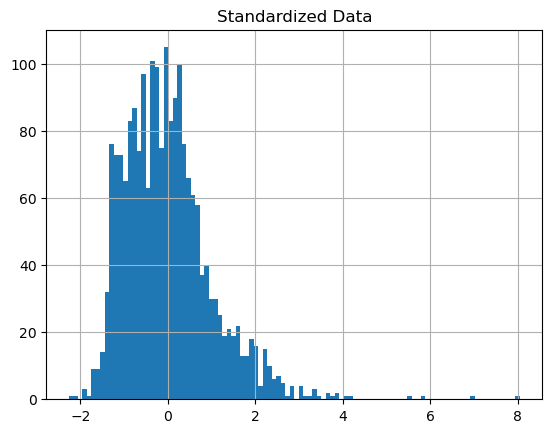

In [32]:
pd.DataFrame(X_trans, columns = X_train7.columns)['gr_liv_area'].hist(bins=100)
plt.title('Standardized Data')
plt.show()

Transform test set with scaler

In [33]:
## Apply the scaler to the test set

X_te = std.transform(X_test7)

In [34]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not output any pandas objects

type(X_train7),type(X_trans),type(X_te)

(pandas.core.frame.DataFrame, numpy.ndarray, numpy.ndarray)

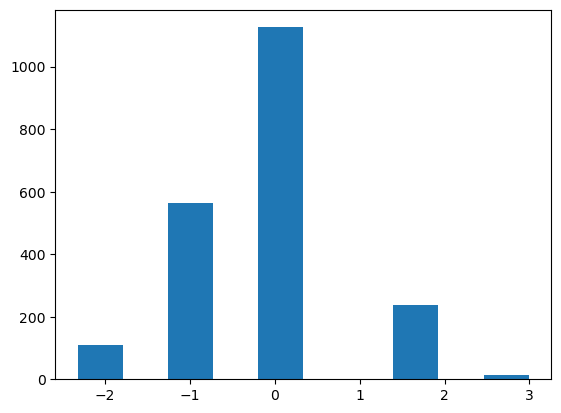

In [35]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they do not necessarily seem to be normally distributed)

plt.hist(X_trans[:,3])
plt.show()

Apply lasso as before to fit model

In [36]:
## Fit a LASSO model on the standardized data
lr_model7 = Lasso(alpha = 1)
lr_model7.fit(X_trans,y_train7)

Lasso(alpha=1)

View coefficients (for understanding)

In [37]:
## Note, it is now difficult to interpret the coefficients
## Would have to do the math to translate back to the original scaling

feature_df=pd.DataFrame(list(zip(X_train7.columns,lr_model7.coef_)), columns = ['Feature', 'Importance'])
feature_df

,Feature,Importance
0,OQ2,80222.727552
1,overall_qual,-48092.203395
2,gr_liv_area,25867.004042
3,garage_cars,8674.675072
4,garage_area,832.721947
5,total_bsmt_sf,8775.180701
6,1st_flr_sf,1607.773259
7,year_built,11952.041119
8,full_bath,-2992.506283


In [38]:
feature_df_sorted = feature_df.sort_values(by='Importance', ascending=False)
feature_df_sorted

,Feature,Importance
0,OQ2,80222.727552
2,gr_liv_area,25867.004042
7,year_built,11952.041119
5,total_bsmt_sf,8775.180701
3,garage_cars,8674.675072
6,1st_flr_sf,1607.773259
4,garage_area,832.721947
8,full_bath,-2992.506283
1,overall_qual,-48092.203395


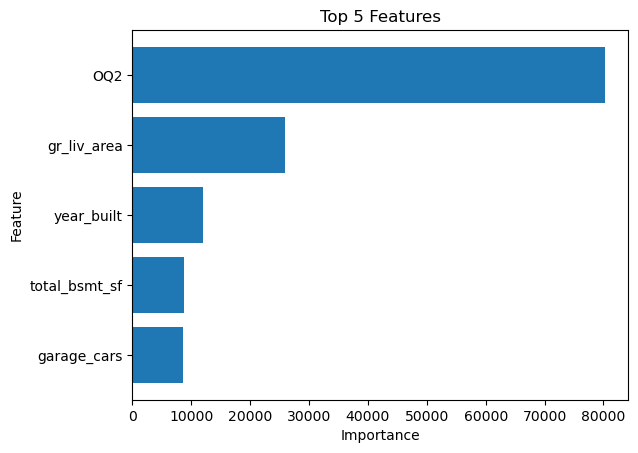

In [41]:
feature_df_sorted = feature_df.sort_values(by='Importance', ascending=True)
plt.barh(feature_df_sorted.tail(5).Feature, feature_df_sorted.tail(5).Importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features')
plt.show()

Predict with model

In [42]:
train_set_pred7 = lr_model7.predict(X_trans)

In [43]:
# test_set_pred7 = lr_model7.predict(pd.DataFrame(X_te,columns=X_train7.columns).loc[:,selected_features_7])
# pd.DataFrame(X_te,columns=X_train.columns)

test_set_pred7 = lr_model7.predict(pd.DataFrame(X_te,columns=X_train7.columns))

/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Assess model

In [44]:
# r2
lr_model7.score(X_test7, y_test7)

/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


-881097.7236116781

In [45]:
mae7 = mean_absolute_error(y_test7, test_set_pred7)
train_mae7 = mean_absolute_error(y_train5, train_set_pred7)
print(f"Train MAD: {train_mae7:.2f}")
print(f"Val MAD: {mae7:.2f}")

Train MAD: 22055.09
Val MAD: 21773.88


In [46]:
rmse7 = np.sqrt(mean_squared_error(y_test7, test_set_pred7))
train_rmse7 = np.sqrt(mean_squared_error(y_train7, train_set_pred7))
print(f"Train RMSE: {train_rmse7:.2f}")
print(f"Val RMSE: {rmse7:.2f}")

Train RMSE: 34371.60
Val RMSE: 33747.95


Compare to other models

In [47]:
# print(
#     'rmse for four models, in order: ', 
#     round(rmse1), 
#     round(rmse2), 
#     round(rmse3), 
#     round(rmse4),
#     round(rmse5),
#     round(rmse6),
#     round(rmse7)
# )


# Model 8: Put it all together with LassoCV

## Finding the "best" value of lambda (alpha) with a single train/test split
Here we will first decide on a vector of "candidate" alpha (lambda) values.  Then, for each candidate value, we run the following steps:
1. Standardize the training data
2. Fit a LASSO model on the training data
3. Using the newly trained model, make predictions on both the training data and the test data
4. Find the sum of squares error on both the training set and test set

Then we plot how the errors change for the different values of alpha.

We can then choose the alpha which gives us the best results on the test set.

Select features and target as before

In [48]:
# same as above

selected_features_8 = list(most_corr_columns.drop('saleprice'))
X8 = df.loc[:,selected_features_8]
y8 = df['saleprice']

X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.3,random_state=42)

In [49]:
alphalist = 10**(np.linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train8.loc[:,selected_features_8], y_train8)
    test_set_pred8 = pipe.predict(X_test8.loc[:,selected_features_8])
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred8 - y_test8)**2))

    train_set_pred8 = pipe.predict(X_train8.loc[:,selected_features_8])
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred8 - y_train8)**2))

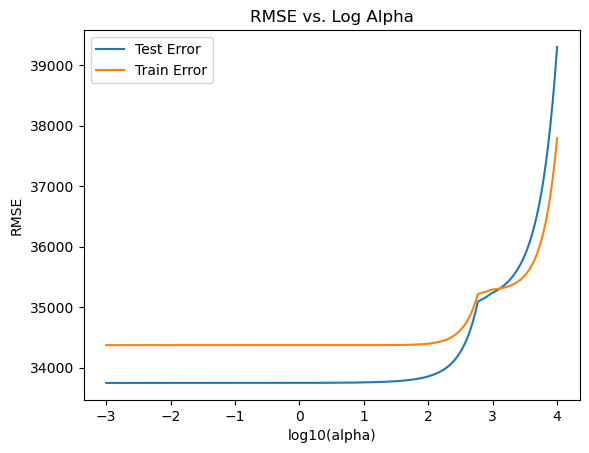

In [50]:
#plot the curves of both the training error and test error as alpha changes

plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)
plt.xlabel('log10(alpha)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Log Alpha')
plt.legend(['Test Error','Train Error'])
plt.show()

In [51]:
## This is the minimum error achieved on the test set across the different alpha values we tried

np.min(err_vec_test)

33747.12932636543

In [52]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_test)]

0.001

## Using LassoCV to find the best alpha via Cross-Validation - put it all together
In the previous, we found the best alpha value by comparing the performance on a single train/test split.  An even better, though more computationally intensive method, is to do a full cross-validation when comparing the different alphas.  Fortunately, the `LassoCV` in sklearn handles this "under the hood".  You pass the `LassoCV` the list of alphas and the number of folds to use for Cross-Validation.  It will do the following:

- For each value of alpha
1. Do a cross-validation and score the result
- Find the value of alpha that gave the best score
- Fit the model on all the data using the value of alpha it just found

Then you can use the `predict` method of the model just as with all of our previous models

In [53]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train8)

StandardScaler()

In [54]:
## Scale the Predictors on both the train and test set
X_trans = std.transform(X_train8)
X_te = std.transform(X_test8)

In [55]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
lr_model8 = LassoCV(alphas = alphavec, cv=5)
lr_model8.fit(X_trans,y_train8)

LassoCV(alphas=array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03, 2.89426612e+03, 8.37677640e+03,
       2.42446202e+04, 7.01703829e+04, 2.03091762e+05, 5.87801607e+05,
       1.70125428e+06, 4.92388263e+06, 1.42510267e+07, 4.12462638e+07,
       1.19377664e+08, 3.45510729e+08, 1.00000000e+09]),
        cv=5)

In [56]:
# This is the best alpha value it found
lr_model8.alpha_

41.246263829013564

In [57]:
# These are the coefficients when it refit using that best alpha
list(zip(X_train8.columns,lr_model8.coef_))

[('OQ2', 76973.65540517372),
 ('overall_qual', -44764.56349088742),
 ('gr_liv_area', 25725.806890589512),
 ('garage_cars', 8519.353629714924),
 ('garage_area', 995.4521618622745),
 ('total_bsmt_sf', 8697.568911812032),
 ('1st_flr_sf', 1737.1183679851554),
 ('year_built', 11814.350257128264),
 ('full_bath', -2877.263021643483)]

Predict

In [58]:
# Make predictions on the test set using the new model
test_set_pred8 = lr_model8.predict(X_te)

Assess

In [59]:
# Find the RMSE on the test set using that model
np.sqrt(np.mean((test_set_pred8 - y_test8)**2))

33785.352610391375

# Update model comparison

In [60]:
# Load the existing model comparison CSV
model_comparison_df = pd.read_csv('model_comparison.csv')

# Create new rows with the stats for each model
new_rows = pd.DataFrame([
    {
        'Model': 'LR_reg_LASSO',
        'R2': lr_model5.score(X_test5, y_test5),
        'Train_MAE': train_mae5,
        'Val_MAE': mae5,
        'Train_RMSE': train_rmse5,
        'Val_RMSE': rmse5
    },
    {
        'Model': 'LR_reg_LassoCV',
        'R2': lr_model6.score(X_test6, y_test6),
        'Train_MAE': train_mae6,
        'Val_MAE': mae6,
        'Train_RMSE': train_rmse6,
        'Val_RMSE': rmse6
    },
    {
        'Model': 'LR_scaled_reg_LASSO',
        'R2': lr_model7.score(X_test7, y_test7),
        'Train_MAE': train_mae7,
        'Val_MAE': mae7,
        'Train_RMSE': train_rmse7,
        'Val_RMSE': rmse7
    },
    {
        'Model': 'LR_scaled_reg_LassoCV',
        'R2': lr_model8.score(X_test8, y_test8),
        'Train_MAE': mean_absolute_error(y_train8, train_set_pred8),
        'Val_MAE': mean_absolute_error(y_test8, test_set_pred8),
        'Train_RMSE': np.sqrt(mean_squared_error(y_train8, train_set_pred8)),
        'Val_RMSE': np.sqrt(mean_squared_error(y_test8, test_set_pred8))
    }
])

# Append the new rows to the dataframe
model_comparison_df = pd.concat([model_comparison_df, new_rows], ignore_index=True).drop_duplicates(subset=['Model'])
model_comparison_df
# Save the updated dataframe back to the CSV
# model_comparison_df.to_csv('model_comparison.csv', index=False)

/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/Users/noah/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


,Model,R2,Train_MAE,Train_RMSE,Val_MAE,Val_RMSE
0,LR_single_feat,0.658290,33366.620987,47588.821126,34331.889385,49010.433084
1,LR_all_feat,0.812914,23604.571316,36245.825551,23472.656831,36264.409574
2,LR_top_20_feat,0.832483,21663.030622,34243.914882,21693.955732,34315.454551
3,LR_Quadratic,0.842040,21674.186381,34055.259913,21395.575448,33322.221688
4,LR_reg_LASSO,0.826893,22851.328415,35374.851869,22572.227319,34883.322362
5,LR_reg_LassoCV,0.837987,22054.601055,34371.595714,21773.208423,33746.998914
6,LR_scaled_reg_LASSO,-881097.723612,22055.093206,34371.596361,21773.881911,33747.950626
7,LR_scaled_reg_LassoCV,-870975.112845,24036.220603,37793.824837,21777.574720,33785.352610
